## How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\jhank\Desktop\DA7\Projects\wego-shut_up_and_take_my_query\data\Headway Data.csv")
#df = pd.read_csv(r"/home/jwhankins177/projects/wego/data/Headway Data.csv")

In [4]:
df.tail(10)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
1981705,120221101,1,91057372,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,23,9.166666
1981706,120221101,1,91057373,2022-11-01,50,8601,2600,329896,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,24,9.416666
1981707,120221101,1,91057381,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,31.933333
1981708,120221101,1,91057382,2022-11-01,55,8604,2374,329899,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,0.000000
1981709,120221101,1,91057723,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,20.916666
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666
1981714,120221101,1,91057882,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.683333


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

#### Create a dataframe containing relevant info.

In [6]:
hdwy = df[['OPERATOR','HDWY_DEV']]
hdwy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   OPERATOR  int64  
 1   HDWY_DEV  float64
dtypes: float64(1), int64(1)
memory usage: 30.2 MB


In [7]:
hdwy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   OPERATOR  int64  
 1   HDWY_DEV  float64
dtypes: float64(1), int64(1)
memory usage: 30.2 MB


In [8]:
hdwy.head(40)

,OPERATOR,HDWY_DEV
0,2088,1.983333
1,2088,3.333333
2,2088,NaN
3,2088,NaN
4,2088,NaN
5,1352,NaN
6,1352,NaN
7,1352,NaN
8,1352,NaN
9,1352,NaN


In [9]:
hdwy.value_counts()

OPERATOR  HDWY_DEV 
409       -0.383334    60
          -0.166667    59
          -0.200000    58
2186       0.000000    58
1020      -0.416667    55
                       ..
1842      -8.833334     1
          -8.800000     1
          -8.783334     1
          -8.766667     1
22554      1.966666     1
Length: 352657, dtype: int64

Drop all rows with nulls.

In [10]:
hdwy.dropna(inplace=True)

c:\Users\jhank\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Rename columns.

In [11]:
hdwy.columns = ['operator', 'hdwy_dev']

In [12]:
hdwy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1507347 entries, 0 to 1981711
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   operator  1507347 non-null  int64  
 1   hdwy_dev  1507347 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 34.5 MB


Group by operator id. Sum.

In [13]:
hdwy_gb = hdwy.groupby(['operator'],as_index = False)['hdwy_dev'].sum()

In [14]:
hdwy_gb

,operator,hdwy_dev
0,0,27.049975
1,30,-8.250001
2,85,-9.833334
3,86,-88.300006
4,93,12.816665
...,...,...
439,2622,-54.933463
440,2623,-75.050044
441,2624,60.749987
442,2630,-24.483389


Graph

<AxesSubplot:>

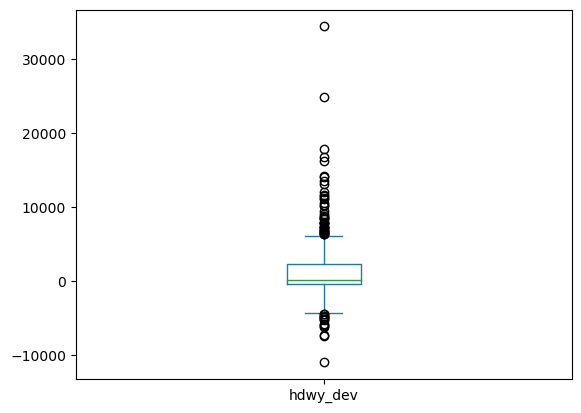

In [15]:
hdwy_gb['hdwy_dev'].plot(kind='box')

In [16]:
hdwy_gb['hdwy_dev'].nlargest(10)

312    34458.480598
18     24896.647263
241    17897.930499
218    16774.281483
238    16289.597135
158    14220.748003
171    14113.280896
14     13593.697703
103    13132.081289
317    12090.679946
Name: hdwy_dev, dtype: float64

In [17]:
hdwy_gb['hdwy_dev'].nsmallest(10)

193   -10925.286407
315    -7406.935503
174    -7227.951619
15     -6159.336547
154    -6042.602813
180    -5833.534662
63     -5748.653927
142    -5155.467901
173    -5056.934770
298    -5016.267764
Name: hdwy_dev, dtype: float64

In [18]:
hdwy_gb.describe()

,operator,hdwy_dev
count,444.000000,444.000000
mean,1814.137387,1238.263620
std,1205.534310,4094.219948
min,0.000000,-10925.286407
25%,1329.250000,-342.363516
50%,1918.500000,146.033248
75%,2373.250000,2303.923642
max,22554.000000,34458.480598


Sum graphs

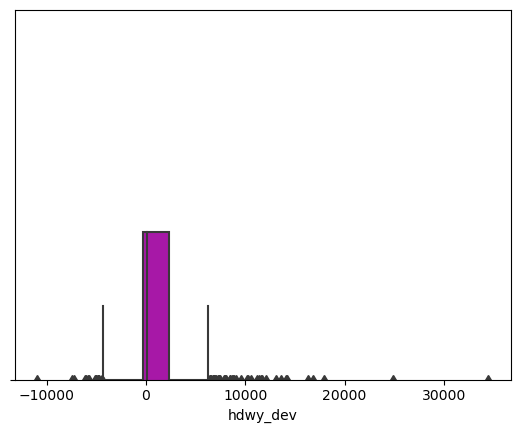

In [19]:
p = sns.boxplot(x="hdwy_dev",
            palette=["m", "g"],
            data=hdwy_gb)
ax = plt.gca()
# ylim max value to be set
y_max = hdwy_gb['hdwy_dev'].value_counts().max() 
ax.set_ylim([0, y_max])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

plt.show()

<AxesSubplot:ylabel='Frequency'>

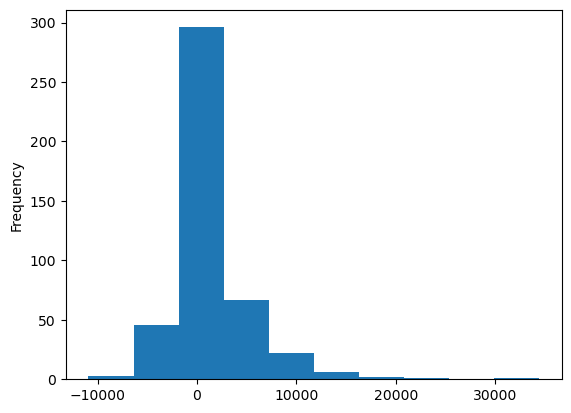

In [20]:
hdwy_gb['hdwy_dev'].plot(kind='hist')

Mean graphs. So mean.

In [21]:
hdwy_mean = hdwy.groupby(['operator'],as_index = False)['hdwy_dev'].mean()

In [22]:
hdwy_mean

,operator,hdwy_dev
0,0,0.360666
1,30,-4.125000
2,85,-9.833334
3,86,-4.013637
4,93,2.563333
...,...,...
439,2622,-0.146100
440,2623,-0.560075
441,2624,1.786764
442,2630,-0.137547


<AxesSubplot:title={'center':'Test'}, ylabel='Frequency'>

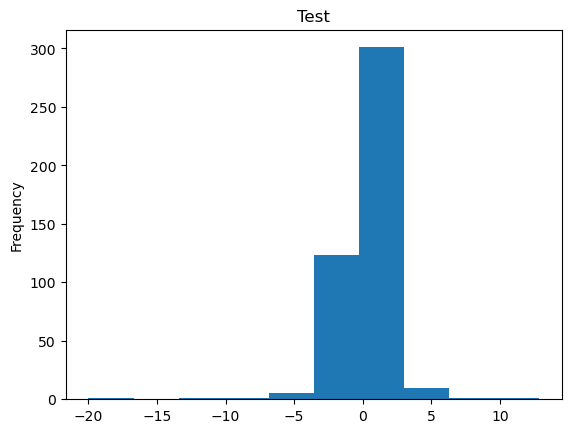

In [23]:
hdwy_mean['hdwy_dev'].plot(kind='hist',title='Test')

Histogram. Averages of hdwy deviation per driver.

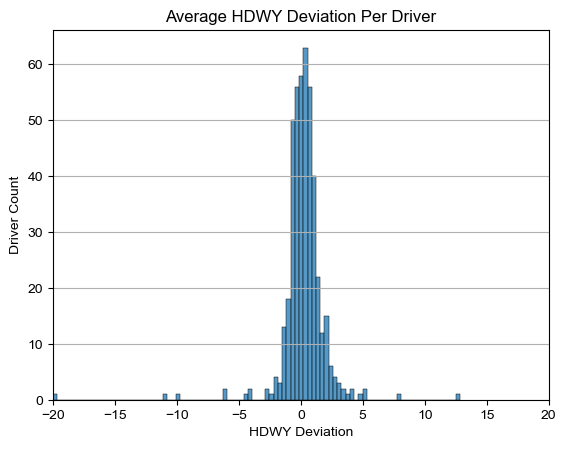

In [24]:
sns.histplot(x="hdwy_dev",
            #palette=['Paired'],
            data=hdwy_mean).set(title = 'Average HDWY Deviation Per Driver',xlabel='HDWY Deviation',ylabel='Driver Count',xlim=(-20,20))
sns.set_theme(style='white', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.grid(visible = True, axis = 'y')


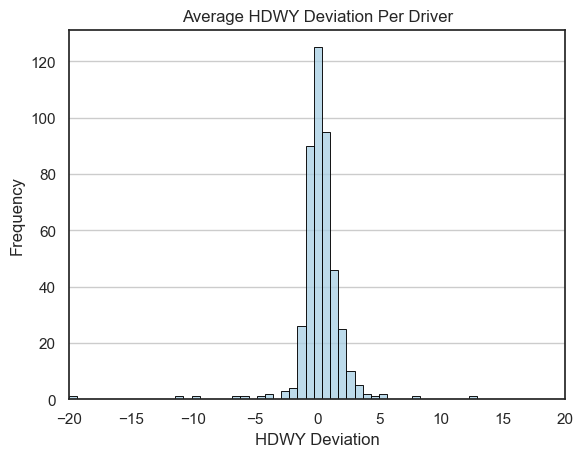

In [32]:
sns.histplot(x="hdwy_dev",
            #palette=['Paired'],
            data=hdwy_mean,edgecolor="0",bins=50).set(title = 'Average HDWY Deviation Per Driver',xlabel='HDWY Deviation',ylabel='Frequency',xlim=(-20,20))
sns.set_theme(style='white', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.grid(visible = True, axis = 'y')

boxplot. average headway per driver.

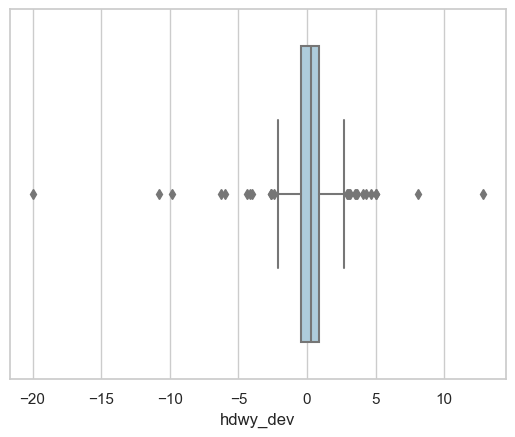

In [ ]:
sns.boxplot(x="hdwy_dev",
            #palette=["m", "g"],
            data=hdwy_mean)
sns.set_theme(style='whitegrid', palette=('Paired'), font='sans-serif', font_scale=1, color_codes=True, rc=None)